In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import veda
import seaborn as sns
import importlib

### Make fake dataset

In [21]:
def make_dataset(size: int=1000, na_percentage: float=0.2, n_feat=8):
    X, y = make_classification(n_samples=size, n_features=n_feat, n_classes=2)
    df = pd.DataFrame(X, columns=[c for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[:n_feat]])
    df["target"]:np.ndarray = y
    for col in df.columns:
        index_sampled = df[col].sample(int(size * (na_percentage + np.random.randint(-3,3)/100))).index
        df.loc[index_sampled, col] = pd.NA # type: ignore
    
    return df


In [22]:
data = make_dataset()
data.head()

,A,B,C,D,E,F,G,H,target
0,-0.415928,-0.567236,-1.645007,0.294417,-1.418509,1.854039,0.009263,NaN,1.0
1,-1.331809,-1.080702,-1.422087,-1.384944,-1.624827,-1.222135,0.007974,NaN,0.0
2,0.130579,0.954396,-0.956781,-2.680075,-0.137924,-2.014748,0.017838,NaN,0.0
3,-1.840107,0.479420,-0.055939,-0.525787,-1.867428,0.424016,0.009131,0.841165,NaN
4,0.258452,NaN,-1.444820,NaN,1.292711,1.584210,-0.002560,-0.540295,1.0


# Test VEDA

## Missing data

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


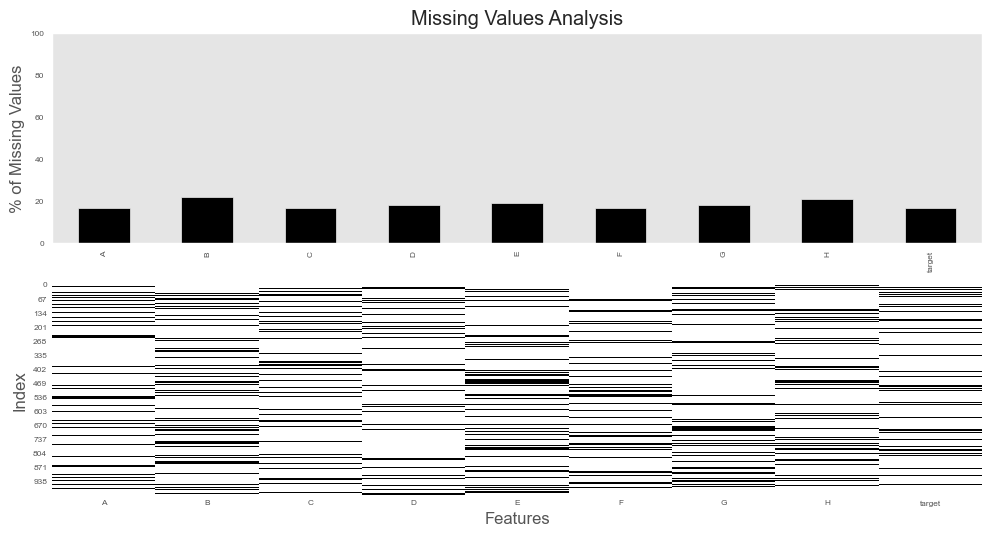

In [23]:
plt.style.use("ggplot")
importlib.reload(veda)

veda.viz_missing(df=data, fig_size=(12, 6))

In [24]:
plt.style.use("ggplot")
importlib.reload(veda)

veda.viz_missing_interactive(df=data)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Distributions

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


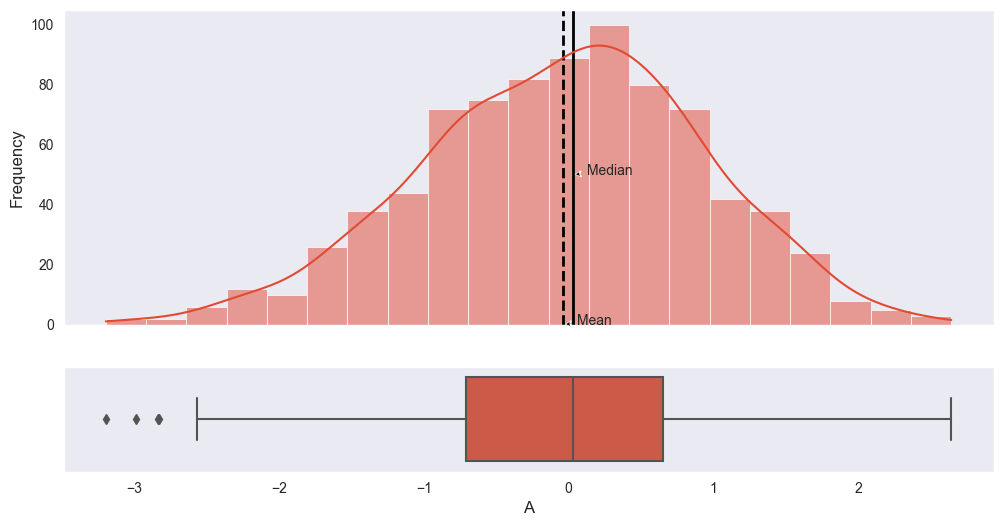

In [27]:
importlib.reload(veda)
veda.viz_distribution(data=data, x_target="A", use_density=True, cumulate=False, fig_size=(12, 6))

## Correlations

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


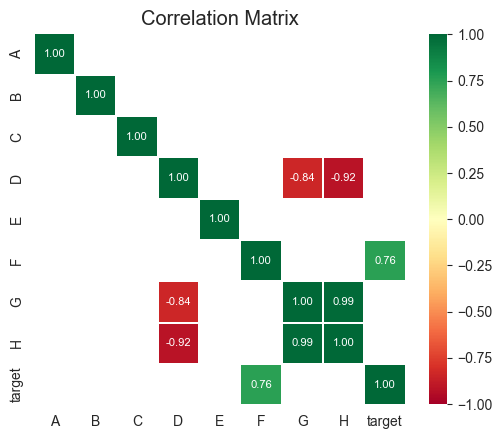

In [35]:
importlib.reload(veda)
veda.viz_correlations(data=data, cutoff=.5, fig_size=6)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 700x700 with 0 Axes>

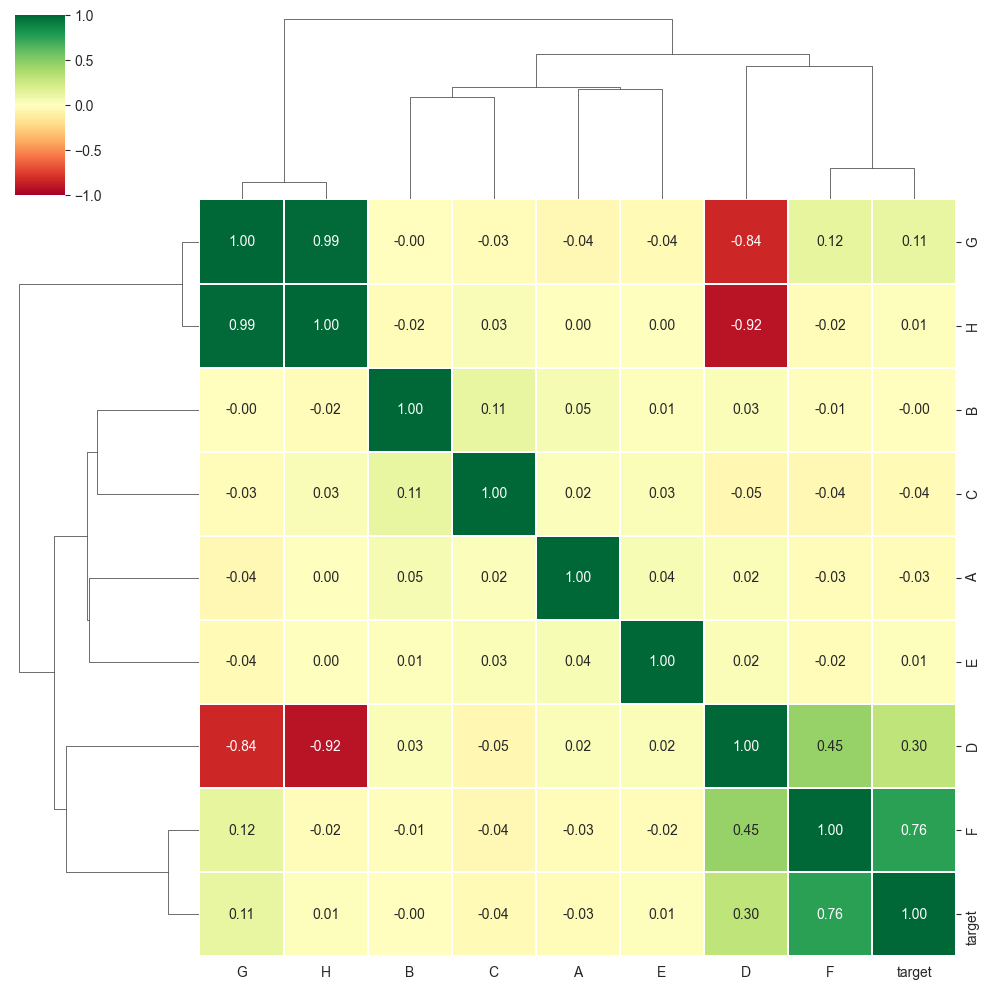

In [46]:
importlib.reload(veda)
veda.viz_clusters_correlations(data=data, cutoff=.0)